Data overview:
- Size of the Data -- 200 rows and 5 features
- Presence of Missing Data -- No
- Scale Data? -- Yes
- How data currently organised?
    - The rows are initially sorted by increasing Annual income

| Features | Detail of Feature | Actions to Take |
| --- | --- | --- |
| CustomerID | unique identification for each individual (int) | Remove (no duplicate records) |
| Gender | gender of the individual (obj)-- male/female | One Hot Encoding |
| Age | age of the individual (int) | scale this feature |
| Annual Income (k$) | individual's annual income (int) | scale this feature |
| Spending Score (1-100) | a metric on the value of a customer (int)| scale this feature |


Personal choices:
- Quality of life changes
    - Changed the dataframe column headers to lowercase and without spaces
- Scaling
    - Release #1... with Min-max scaling (between 0 and 1).


Modelling
- General
    - Release #1...the use of algorithms that partition the data


## Dependencies

In [2]:
import os
def working_directory():
    """fixed the issue

    Returns:
        str: the location of the ideal directory
    """
    return os.getcwd().replace("\\notebooks","")
os.chdir(working_directory())

In [3]:
# standard libraries
import os
import sys
import multiprocessing

# related third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from pyclustertend import hopkins
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
import joblib

# Local application/library specific imports
from src.config import RAW_DATA_FILE

In [12]:
#sns.axes_style('dark')
sns.set_style('dark')

# Collecting data

In [34]:
df = pd.read_csv(RAW_DATA_FILE)

In [39]:
df.head(4)

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


## Quality of Life Changes

In [36]:
df.columns = [column.lower().replace(' ','_') for column in df.columns]
continuous_var = ['age','annual_income_(k$)','spending_score_(1-100)']
categorical_var = ['gender']
features = ['gender','age','annual_income_(k$)','spending_score_(1-100)']

In [38]:
df.head(4)

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


## Data Description

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerid              200 non-null    int64 
 1   gender                  200 non-null    object
 2   age                     200 non-null    int64 
 3   annual_income_(k$)      200 non-null    int64 
 4   spending_score_(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 200 rows and 5 columns


In [48]:
print(f"Is there missing data:\n{df.isna().sum()} \n ---")

Is there missing data:
customerid                0
gender                    0
age                       0
annual_income_(k$)        0
spending_score_(1-100)    0
dtype: int64 
 ---


In [50]:
print(f"description of data\n{df.describe()}")

description of data
       customerid         age  annual_income_(k$)  spending_score_(1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


# Visualisations

## Univariate Exploration

### Age

- Questions:
    - What is the distribution of age?
- Findings:
- Decisions:

In [51]:
df.age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: age, dtype: float64

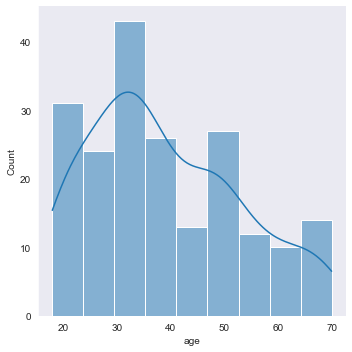

In [52]:
sns.displot(df.age,kde=True)

### Gender

- Questions:
- Findings:
- Decisions:

In [53]:
df.gender.describe()

count        200
unique         2
top       Female
freq         112
Name: gender, dtype: object

<AxesSubplot:xlabel='gender', ylabel='count'>

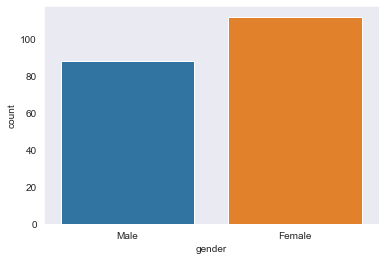

In [54]:
#visual representation of the count difference between gender
sns.countplot(x='gender',data=df)

### Annual Income (k$)

- Questions:
- Findings:
- Decisions:

In [55]:
df["annual_income_(k$)"].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: annual_income_(k$), dtype: float64

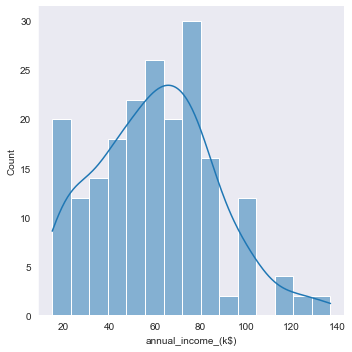

In [56]:
sns.displot(df['annual_income_(k$)'], kde=True,bins=15)

<AxesSubplot:xlabel='age', ylabel='spending_score_(1-100)'>

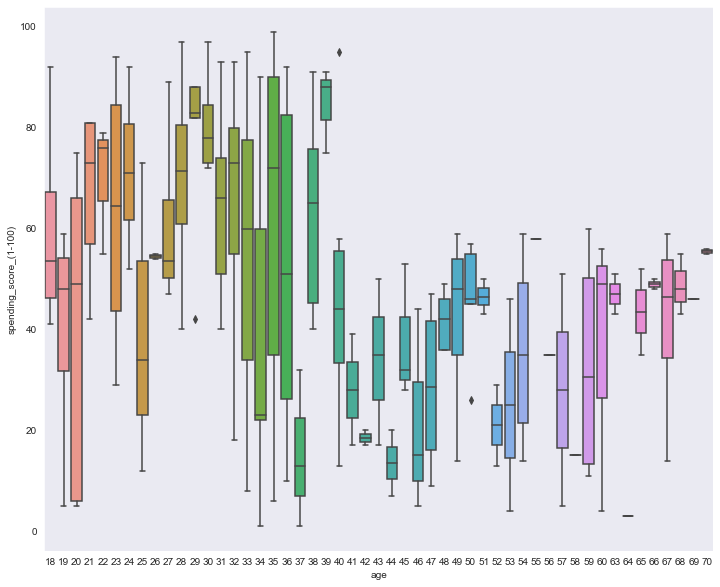

In [57]:
plt.figure(figsize=(12,10))
sns.boxplot(x='age',
            y='spending_score_(1-100)',data=df)

## Bivariate Analysis

- Questions:
- Findings:
- Decisions:

In [58]:
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

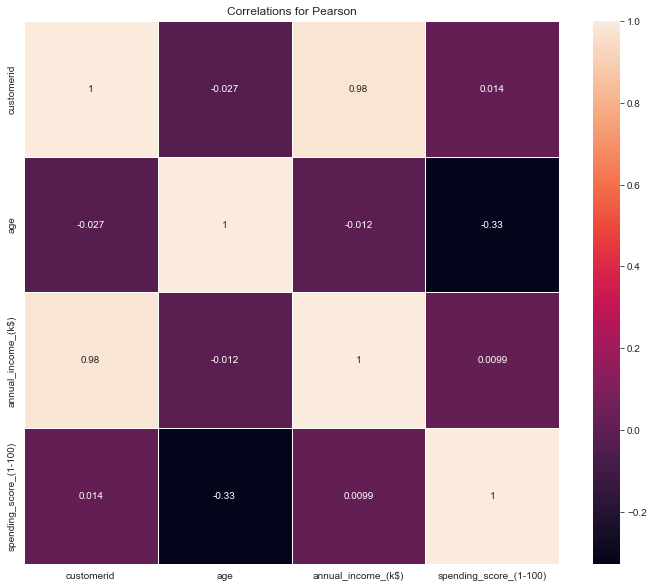

In [59]:
plt.figure(figsize=(12,10))
plt.title("Correlations for Pearson")
sns.heatmap(pearson_corr,linewidths=1, linecolor='white',annot=True)
plt.show()

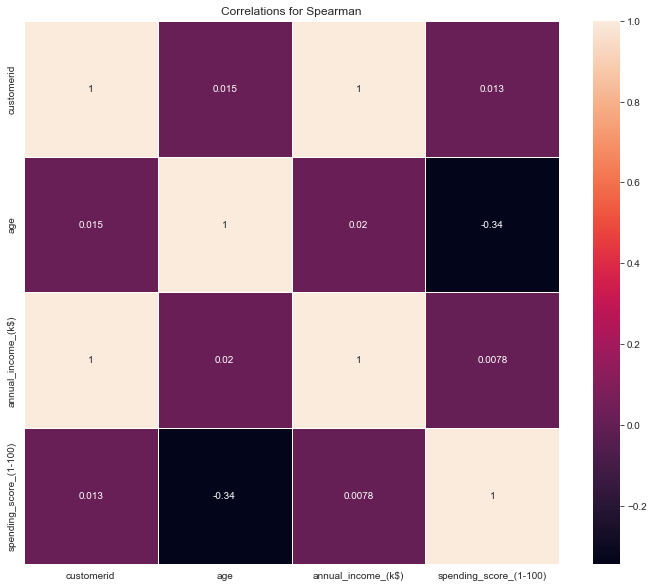

In [60]:
plt.figure(figsize=(12,10))
plt.title("Correlations for Spearman")
sns.heatmap(spearman_corr,linewidths=1, linecolor='white',annot=True)
plt.show()

## Outliers Actions 

## Variable transformation

## Variable Creation

# Data Processing

In [32]:
df

,gender,age,annual_income_(k$),spending_score_(1-100)
CustomerID,,,,
1,1,19,0.000000,0.387755
2,1,21,0.000000,0.816327
3,0,20,0.008197,0.051020
4,0,23,0.008197,0.775510
5,0,31,0.016393,0.397959
...,...,...,...,...
196,0,35,0.860656,0.795918
197,0,45,0.909836,0.275510
198,1,32,0.909836,0.744898


In [61]:
ohe = OneHotEncoder(drop='first',sparse=False,dtype=int)
scaler = MinMaxScaler()
df.iloc[:,2:] = scaler.fit_transform(df.iloc[:,2:])
df['gender'] = ohe.fit_transform(df[['gender']])
X = df.drop('customerid',axis=1)

In [63]:
X

,gender,age,annual_income_(k$),spending_score_(1-100)
0,1,0.019231,0.000000,0.387755
1,1,0.057692,0.000000,0.816327
2,0,0.038462,0.008197,0.051020
3,0,0.096154,0.008197,0.775510
4,0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0,0.326923,0.860656,0.795918
196,0,0.519231,0.909836,0.275510
197,1,0.269231,0.909836,0.744898
198,1,0.269231,1.000000,0.173469
